In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/Users/felixhermes/code/miguelferreira13/wildfire_prediction/wildfire_prediction/data/FH_data.csv')

In [3]:
data.drop(columns = ['Unnamed: 0', 'split'], inplace = True)

In [4]:
data.head()

,Region,count()[unit: km^2],max() Precipitation,max() RelativeHumidity,max() SoilWaterContent,max() SolarRadiation,max() Temperature,max() WindSpeed,mean() Precipitation,mean() RelativeHumidity,...,Permanent water bodies,Herbaceous wetland,"Closed forest, evergreen, broad leaf","Closed forest, deciduous broad leaf","Closed forest, unknown","Open forest, evergreen broad leaf","Open forest, deciduous broad leaf","Open forest, unknown definitions",Open sea,target
0,NSW,8.002343e+05,1.836935,80.522964,0.414305,32.169781,35.878704,7.670482,0.044274,36.355567,...,0.2,0.1,14.7,6.8,0.3,0.5,3.7,10.3,0.1,0
1,NT,1.357561e+06,315.266815,95.683342,0.496140,31.634459,38.136787,9.704402,9.884958,61.494675,...,0.1,0.1,1.0,7.7,0.1,0.1,13.6,9.3,0.5,1
2,QL,1.730605e+06,74.452164,95.898270,0.472416,31.982830,37.047943,7.675632,1.453053,47.959364,...,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1
3,SA,9.913151e+05,3.193624,81.980751,0.263911,31.734528,38.326847,10.044715,0.059078,30.057683,...,1.2,0.1,0.3,1.3,0.1,0.1,1.4,5.3,0.6,0
4,TA,6.778526e+04,13.604791,81.501442,0.368189,33.225517,16.228510,11.432408,3.099497,65.086764,...,1.9,1.4,50.1,0.6,1.1,7.2,1.5,7.2,3.0,0


## preprocessing

In [5]:
data.isnull().sum().sort_values(ascending=False)

Vegetation_index_variance                                   63
Vegetation_index_mean                                       63
mean() RelativeHumidity                                     42
max() RelativeHumidity                                      42
variance() RelativeHumidity                                 42
min() RelativeHumidity                                      42
mean() WindSpeed                                            28
min() WindSpeed                                             28
variance() WindSpeed                                        28
max() WindSpeed                                             28
min() SolarRadiation                                        14
mean() SolarRadiation                                       14
mean() Temperature                                          14
variance() Temperature                                      14
max() Temperature                                           14
variance() SolarRadiation                              

In [6]:
data.Region.unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

In [7]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import KNNImputer

ohe = OneHotEncoder(sparse = False)
ohe.fit(data[['Region']]) 
region_encoded = ohe.transform(data[['Region']])

data["NSW"],data["NT"],data['QL'], data['SA'], data['TA'], data['VI'], data['WA'] = region_encoded.T 
data.drop(columns = 'Region', inplace = True)
imputer = KNNImputer()
data = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)

In [8]:
data.head()

,count()[unit: km^2],max() Precipitation,max() RelativeHumidity,max() SoilWaterContent,max() SolarRadiation,max() Temperature,max() WindSpeed,mean() Precipitation,mean() RelativeHumidity,mean() SoilWaterContent,...,"Open forest, unknown definitions",Open sea,target,NSW,NT,QL,SA,TA,VI,WA
0,8.002343e+05,1.836935,80.522964,0.414305,32.169781,35.878704,7.670482,0.044274,36.355567,0.170931,...,10.3,0.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.357561e+06,315.266815,95.683342,0.496140,31.634459,38.136787,9.704402,9.884958,61.494675,0.167735,...,9.3,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.730605e+06,74.452164,95.898270,0.472416,31.982830,37.047943,7.675632,1.453053,47.959364,0.185641,...,11.0,0.3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,9.913151e+05,3.193624,81.980751,0.263911,31.734528,38.326847,10.044715,0.059078,30.057683,0.056047,...,5.3,0.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,6.778526e+04,13.604791,81.501442,0.368189,33.225517,16.228510,11.432408,3.099497,65.086764,0.211360,...,7.2,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [57]:
X = data.drop(columns=['Estimated_fire_area', 'target'])
y = data.target

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test),columns = X_test.columns)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test),columns = X_test.columns)

In [12]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter = 2000)

In [13]:
log_model.fit(X_train, y_train)
result = log_model.predict(X_test)

In [14]:
np.unique(result)

array([0., 1.])

In [15]:
result.sum()

7735.0

In [16]:
y_test.sum()

7958.0

In [17]:
difference = y_test - result
unique, counts = np.unique(difference, return_counts=True)
dic = dict(zip(unique, counts))
score = (dic[-1] + dic[1])/len(y_test)
1- score

0.8228929384965832

In [18]:
log_model.score(X_test, y_test)

0.8228929384965832

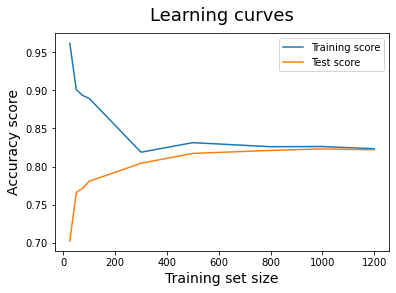

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = LogisticRegression(max_iter=2000),
                                                              X = X_train, 
                                                              y = y_train, 
                                                              train_sizes = [25,50,75,100,300,500,800, 1000, 1200], 
                                                              cv = 20)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Accuracy score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
#plt.xlim([0, 1000])
#plt.ylim([0, 1])
plt.legend()

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 22)
knn_model.fit(X_train, y_train)
result_knn = log_model.predict(X_test)
knn_model.score(X_test, y_test)

0.8272860397006183

Text(0, 0.5, 'R2 score')

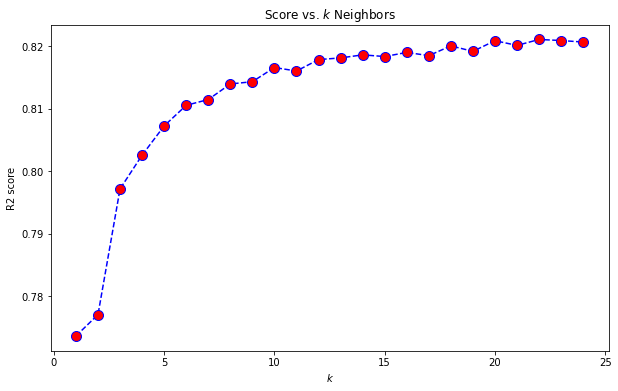

In [23]:
score = []
neighbours = []

for k in range(1,25):
    
    # Instanciate the model
    knn_model = KNeighborsClassifier(n_neighbors = k)

    # Train the model on the scaled Training data
    cv_results = cross_validate(knn_model, X,y)

    # Append the score and k
    score.append(cv_results['test_score'].mean())
    neighbours.append(k)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,25),score,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Score vs. $k$ Neighbors')
plt.xlabel('$k$')
plt.ylabel('R2 score')

In [27]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
result_nb = log_model.predict(X_test)
nb_model.score(X_test, y_test)

0.7965343312723723

In [56]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC(max_iter = 2000, C = 0.5)
svc_model.fit(X_train, y_train)
result_svc = svc_model.predict(X_test)
svc_model.score(X_test, y_test)

/Users/felixhermes/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7727790432801822

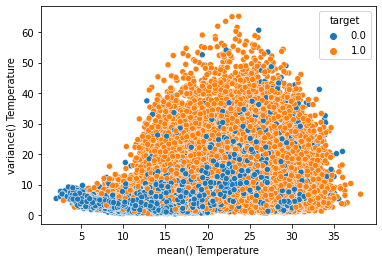

In [67]:
import seaborn as sns
sns.scatterplot(x = data['mean() Temperature'], y = data['variance() Temperature'], hue = data['target']);

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 250, max_depth = 25)
rf_model = rf_model.fit(X_train, y_train)
result_rf =rf_model.predict(X_test)
rf_model.score(X_test, y_test)

0.8428246013667426

## Let's do it with less features 

In [45]:
X = data[['mean() Precipitation', 'mean() RelativeHumidity', 'mean() SoilWaterContent', 'mean() SolarRadiation', 'mean() Temperature', 'mean() WindSpeed', 'Vegetation_index_mean']]
y = data.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test),columns = X_test.columns)

In [47]:
log_model_reduced = LogisticRegression(max_iter = 2000)
log_model_reduced.fit(X_train, y_train)
result = log_model_reduced.predict(X_test)
log_model_reduced.score(X_test, y_test)

0.7736739342661894

<AxesSubplot:xlabel='Vegetation_index_mean', ylabel='Count'>

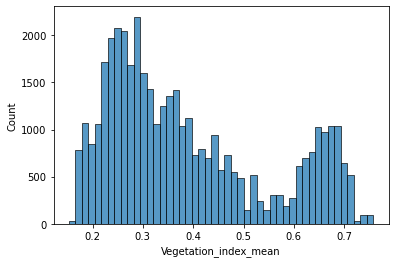

In [55]:
sns.histplot(data['Vegetation_index_mean'])